In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import wasserstein_distance
from sklearn.preprocessing import StandardScaler

ds = xr.open_dataset("/home/phyto/ModelOutput/merged/abundances.nc")

traits = pd.read_csv("/home/phyto/CoccoML/data/traits.csv")
species_list =  traits['species'].to_numpy()
variable_list = ["temperature", "DIC", "din", "irradiance", "si", "o2"]


variables = np.append(species_list, variable_list)

#['temperature', 'shannon', "total", "DIC", "din", "o2", "si", "irradiance", 'Emiliania huxleyi', 'Florisphaera profunda', 'Calcidiscus leptoporus', "Gephyrocapsa oceanica", "Coccolithus pelagicus"]
ds = ds[variables]
d = ds.to_dataframe()
ds = None
d= d.dropna()
d[d < 0] = 0
d = d.sample(10000)



def find_emd_dist(d, variable_list, species_list):

    scaler = StandardScaler()  
    scaler.fit(d[variable_list])  
    d[variable_list]= scaler.transform(d[variable_list])


    def emd(d, variable, species):
        dist = wasserstein_distance(d[variable], d[variable],  d[species], d['Emiliania huxleyi'])
        return(dist)

    value = []

    for i in range(0, len(variable_list)):
        for j in range(0, len(species_list)):
            distance = emd(d, variable_list[i], species_list[j])
            ehux_mean = np.average(d[variable_list[i]], weights=d["Emiliania huxleyi"])
            species_mean = np.average(d[variable_list[i]], weights=d[species_list[j]])

            if species_mean < ehux_mean:
                distance = -1*distance

            value.append({'variable': variable_list[i], "value":distance, "species":species_list[j]})


    df = pd.DataFrame(data=value)

    dist = df.pivot(index='species', columns='variable', values='value')

    return(dist)


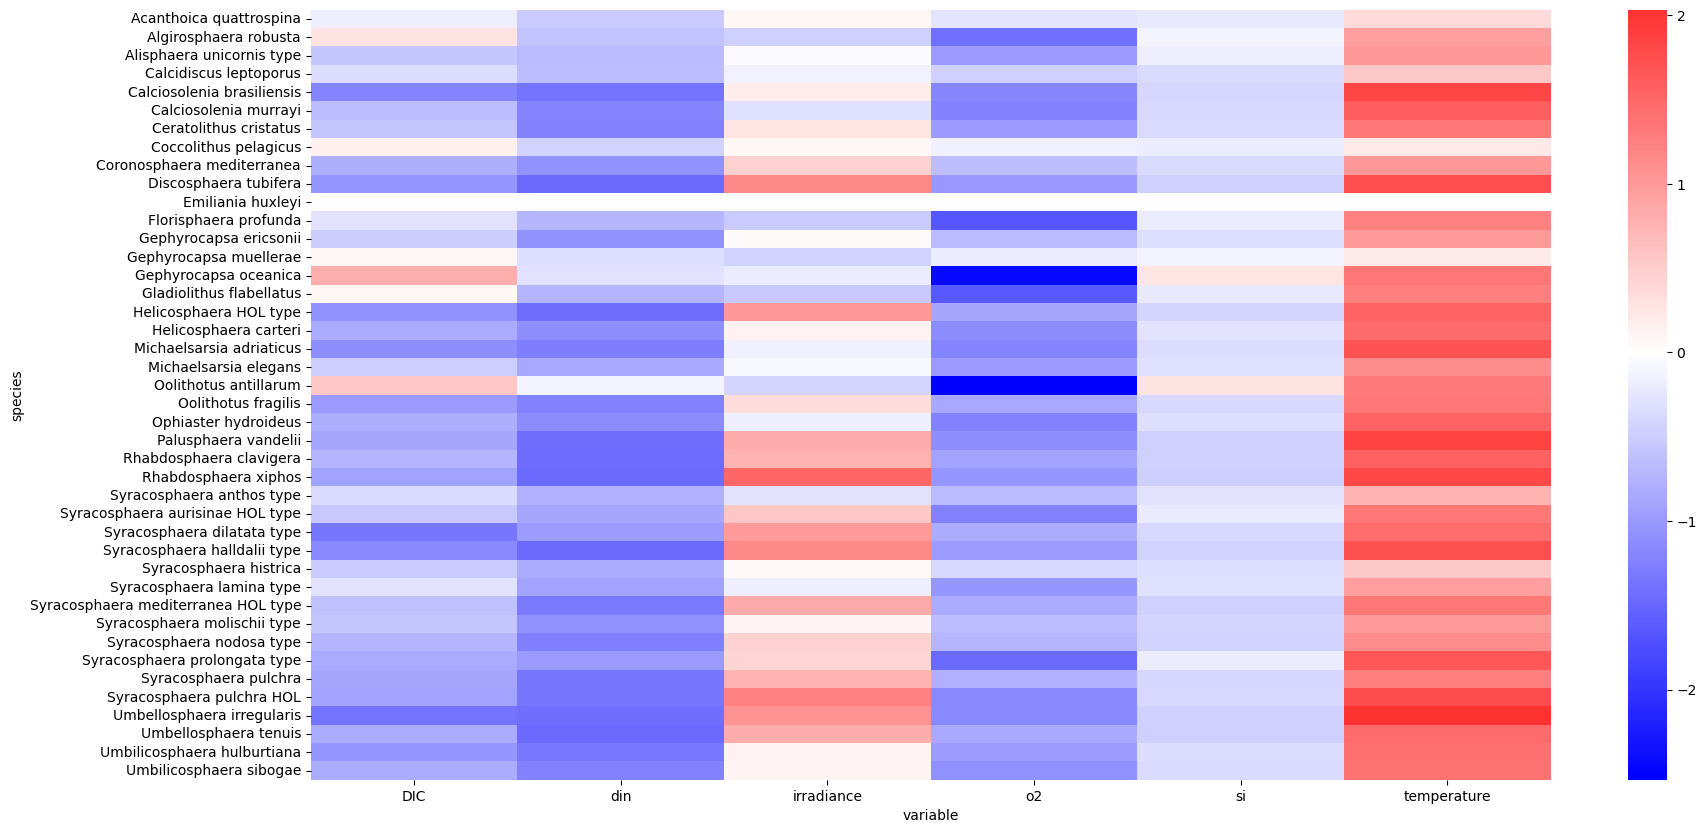

fin


In [6]:
plt.figure(figsize=(20, 10))
sns.heatmap(dist, cmap="bwr", xticklabels = 1, center=0)
plt.show()
print("fin")
